In [1]:
!conda info


     active environment : p37_GCN
    active env location : /usr/prakt/s0014/anaconda3/envs/p37_GCN
            shell level : 2
       user config file : /usr/prakt/s0014/.condarc
 populated config files : 
          conda version : 4.10.1
    conda-build version : 3.20.5
         python version : 3.8.5.final.0
       virtual packages : __cuda=11.3=0
                          __linux=5.8.0=0
                          __glibc=2.31=0
                          __unix=0=0
                          __archspec=1=x86_64
       base environment : /usr/prakt/s0014/anaconda3  (writable)
      conda av data dir : /usr/prakt/s0014/anaconda3/etc/conda
  conda av metadata url : https://repo.anaconda.com/pkgs/main
           channel URLs : https://repo.anaconda.com/pkgs/main/linux-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/linux-64
                          https://repo.anaconda.com/pkgs/r/noarch
          packag

In [2]:
import sys  
sys.path.insert(0, '../005_src/') #use relative path

In [3]:
import os
os.chdir("/storage/remote/atcremers50/ss21_multiagentcontrol/005_src")

In [4]:
from config import *

----------------------------------------
Packages import successful
Variables import successful
Helper Functions import successful
Helper Functions import successful
Functions import successful
Functions graph import successful
----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------



In [5]:
os.listdir(DATA_FOLDER)

['GCN_input',
 'dataframes',
 'xml',
 'gifs',
 'figures',
 'cross_002',
 'cross_003',
 'cross',
 'flow_town4',
 'cross_001',
 '.ipynb_checkpoints',
 'sumo_files_from_local',
 'cross_004']

In [7]:
load_df = 14
l = '%06d' % load_df
dataframes_path = os.path.join(DATA_FOLDER ,"dataframes/")
df_savepath = os.path.join(dataframes_path,f"df_sim_{l}.zip")
df = pd.read_csv(df_savepath)
df = format_df(df,source =".zip")
df.sort_values(by=['timestep','vehID'])

,timestep,vehID,X,Y,yaw,type,speed,pos,lane,slope,group,num_collisions
0,0,flow1.0,92.0,194.900000,180.0,DEFAULT_VEHTYPE,0.000000,5.100000,4i_0,0.0,0,0
1,1,flow1.0,92.0,192.350056,180.0,DEFAULT_VEHTYPE,2.549944,7.649944,4i_0,0.0,0,0
2,2,flow1.0,92.0,187.591225,180.0,DEFAULT_VEHTYPE,4.758831,12.408775,4i_0,0.0,0,0
3,3,flow1.0,92.0,180.417182,180.0,DEFAULT_VEHTYPE,7.174044,19.582818,4i_0,0.0,0,0
4,4,flow1.0,92.0,171.089026,180.0,DEFAULT_VEHTYPE,9.328156,28.910974,4i_0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15189,19996,flow1.299,92.0,114.601091,180.0,DEFAULT_VEHTYPE,0.000000,85.398909,4i_0,0.0,593,0
15190,19997,flow1.299,92.0,114.601091,180.0,DEFAULT_VEHTYPE,0.000000,85.398909,4i_0,0.0,593,0
15191,19998,flow1.299,92.0,114.601091,180.0,DEFAULT_VEHTYPE,0.000000,85.398909,4i_0,0.0,593,0
15192,19999,flow1.299,92.0,114.601091,180.0,DEFAULT_VEHTYPE,0.000000,85.398909,4i_0,0.0,593,0


In [11]:
df.round(2)

,timestep,vehID,X,Y,yaw,type,speed,pos,lane,slope,group,num_collisions
0,0,flow1.0,92.0,194.90,180.0,DEFAULT_VEHTYPE,0.00,5.10,4i_0,0.0,0,0
1,1,flow1.0,92.0,192.35,180.0,DEFAULT_VEHTYPE,2.55,7.65,4i_0,0.0,0,0
2,2,flow1.0,92.0,187.59,180.0,DEFAULT_VEHTYPE,4.76,12.41,4i_0,0.0,0,0
3,3,flow1.0,92.0,180.42,180.0,DEFAULT_VEHTYPE,7.17,19.58,4i_0,0.0,0,0
4,4,flow1.0,92.0,171.09,180.0,DEFAULT_VEHTYPE,9.33,28.91,4i_0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15189,19996,flow1.299,92.0,114.60,180.0,DEFAULT_VEHTYPE,0.00,85.40,4i_0,0.0,593,0
15190,19997,flow1.299,92.0,114.60,180.0,DEFAULT_VEHTYPE,0.00,85.40,4i_0,0.0,593,0
15191,19998,flow1.299,92.0,114.60,180.0,DEFAULT_VEHTYPE,0.00,85.40,4i_0,0.0,593,0
15192,19999,flow1.299,92.0,114.60,180.0,DEFAULT_VEHTYPE,0.00,85.40,4i_0,0.0,593,0


In [8]:
xml_data = "../004_data/xml/sumoout_smallerCross_shortened.xml"
df_raw = xml_to_df(xml_data)  # columns: time, id, x, y, angle, type, speed, pos, lane, slope
df_xml = format_df(df_raw) # columns: time, vehID, X, Y, yaw, type, speed, pos, lane, slope
df_xml

,time,vehID,X,Y,yaw,type,speed,pos,lane,slope
0,0.00,0,92.00,194.90,180.0,DEFAULT_VEHTYPE,0.00,5.10,4i_0,0.0
1,1.00,0,92.00,192.98,180.0,DEFAULT_VEHTYPE,1.92,7.02,4i_0,0.0
2,2.00,0,92.00,189.34,180.0,DEFAULT_VEHTYPE,3.64,10.66,4i_0,0.0
3,3.00,0,92.00,183.70,180.0,DEFAULT_VEHTYPE,5.64,16.30,4i_0,0.0
4,3.00,1,92.00,194.90,180.0,DEFAULT_VEHTYPE,0.00,5.10,4i_0,0.0
...,...,...,...,...,...,...,...,...,...,...
3709,381.00,89,150.43,108.00,270.0,DEFAULT_VEHTYPE,12.56,49.57,2i_0,0.0
3710,381.00,90,194.90,108.00,270.0,DEFAULT_VEHTYPE,0.00,5.10,2i_0,0.0
3711,381.00,91,92.00,170.03,180.0,DEFAULT_VEHTYPE,8.89,29.97,4i_0,0.0
3712,381.00,92,70.40,98.40,90.0,DEFAULT_VEHTYPE,0.00,70.40,1i_2,0.0


In [49]:
X,Y = [],[]
for e in list(map(eval,df['position (X,Y)'])): 
    X.append(e[0])
    Y.append(e[1])

print (len(X),len(Y))

15580 15580


In [43]:
df['X'] = X
df['Y'] = Y

In [59]:
df.sort_values(by=['timestep','vehID'])

,timestep,vehID,X,Y,yaw,type,speed,pos,lane,slope,group,num_collisions
0,0,flow1.0,194.900000,108.000000,270.0,DEFAULT_VEHTYPE,0.000000,5.100000,2i_0,0.0,0,0
1,1,flow1.0,193.110649,108.000000,270.0,DEFAULT_VEHTYPE,1.789351,6.889351,2i_0,0.0,0,0
2,2,flow1.0,189.349413,108.000000,270.0,DEFAULT_VEHTYPE,3.761236,10.650587,2i_0,0.0,0,0
3,3,flow1.0,183.863666,108.000000,270.0,DEFAULT_VEHTYPE,5.485746,16.136334,2i_0,0.0,1,0
4,3,flow1.1,194.900000,108.000000,270.0,DEFAULT_VEHTYPE,0.000000,5.100000,2i_0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15575,1604,flow1.298,104.800000,127.329631,0.0,DEFAULT_VEHTYPE,10.995054,13.729631,4o_1,0.0,263,0
15576,1605,flow1.298,104.800000,139.702658,0.0,DEFAULT_VEHTYPE,12.373027,26.102658,4o_1,0.0,263,0
15577,1606,flow1.298,104.800000,153.616457,0.0,DEFAULT_VEHTYPE,13.913799,40.016457,4o_1,0.0,263,0
15578,1607,flow1.298,104.800000,169.768340,0.0,DEFAULT_VEHTYPE,16.151883,56.168340,4o_1,0.0,263,0


In [ ]:
df.sort_values(by=['vehID','timestep'])

In [58]:
#df.insert(2, 'Y', Y)
#df.insert(2, 'X', X)
df.drop(columns=['position (X,Y)'] ,inplace = True)

300 unique vehicles found in the simulation


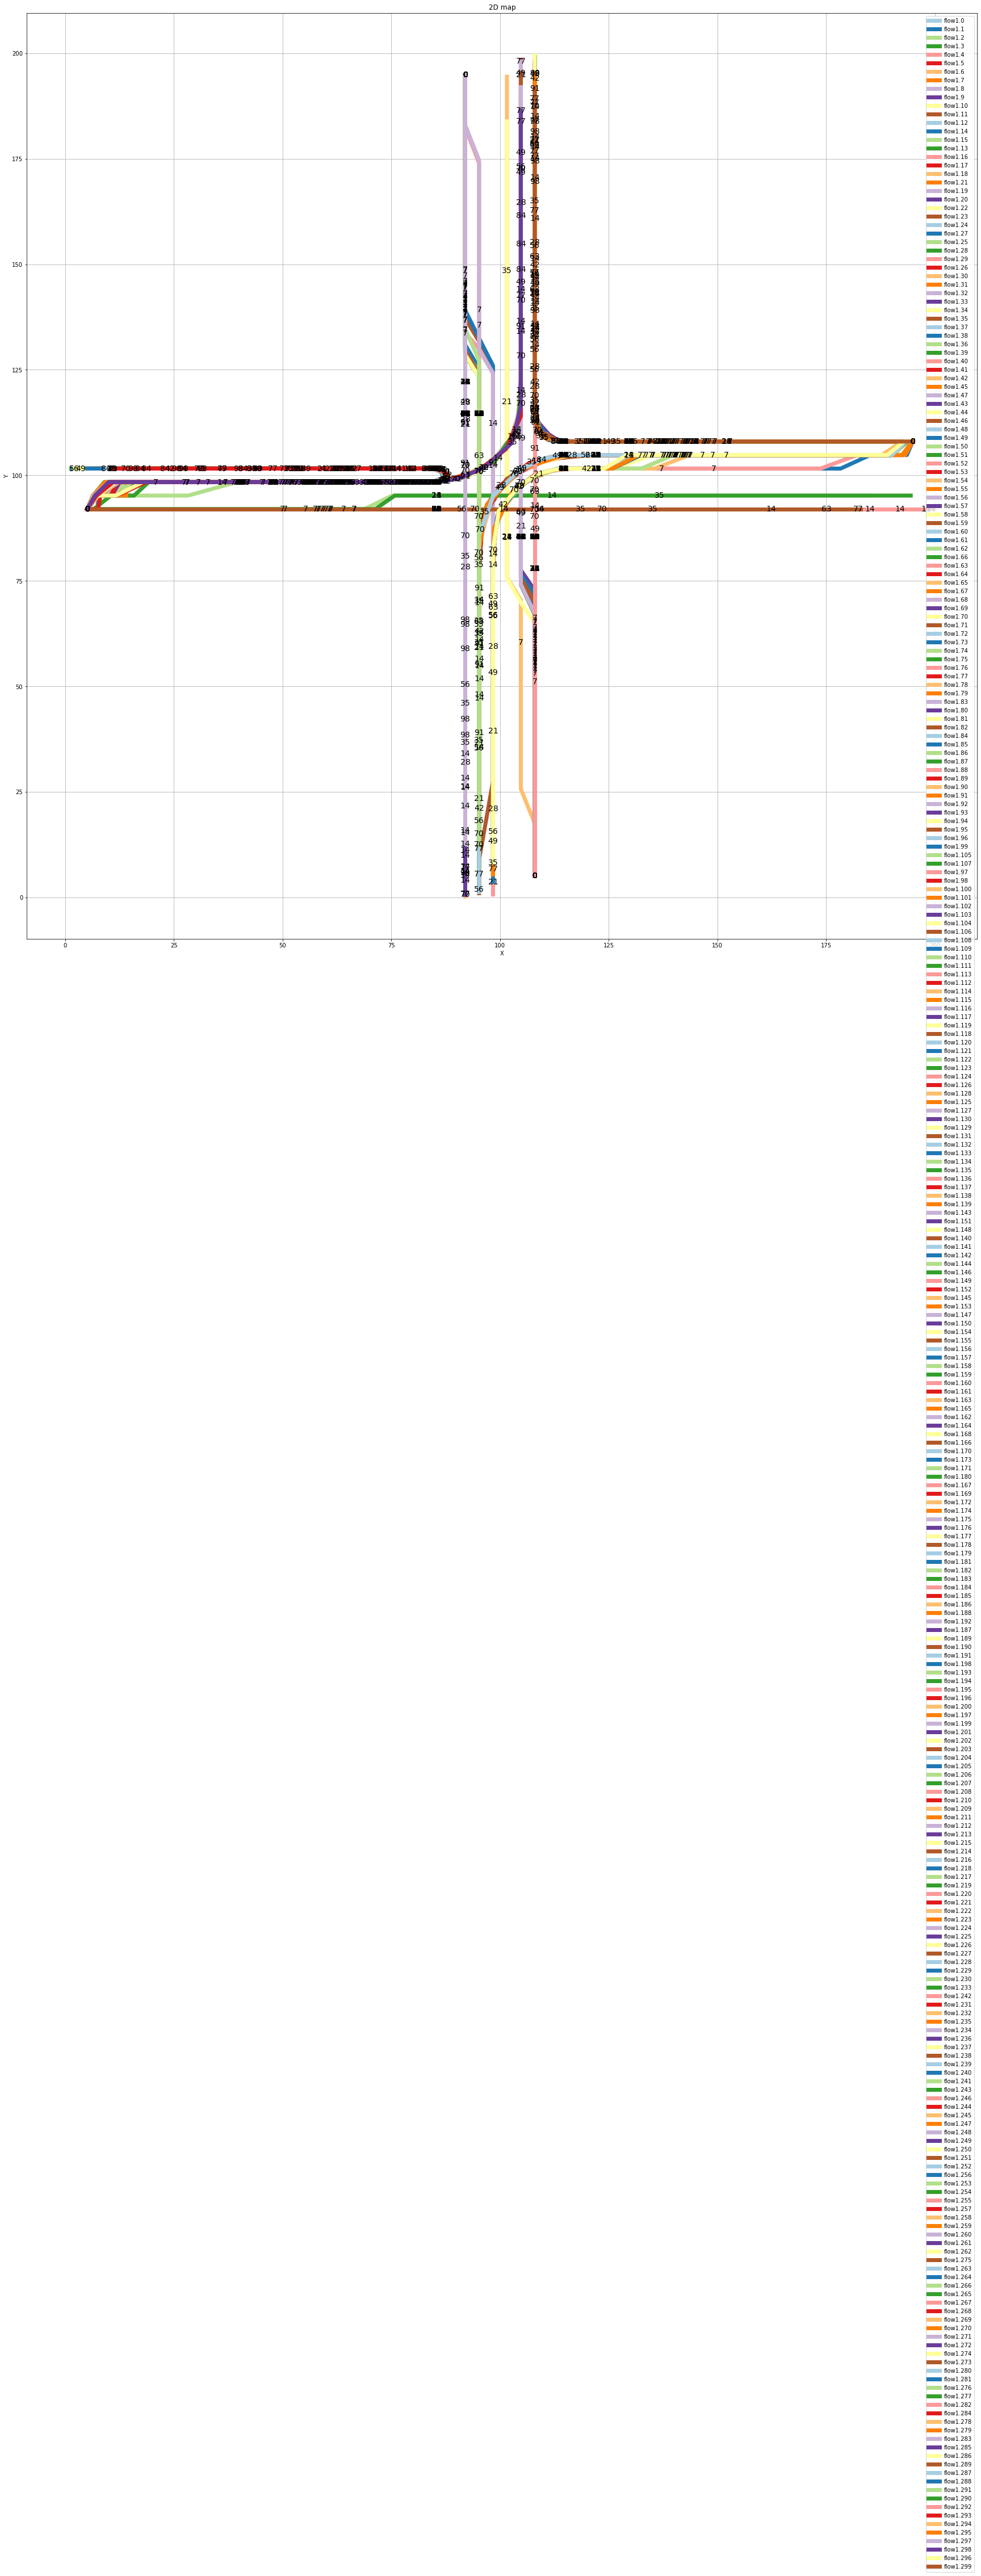

In [60]:
plot_2D(df)

this data up here is quite useless for the purpose...

## Read xml files

In [27]:
xml_data = "../data/xml/data_20timesteps.xml"
xml_data = "../data/xml/data_withLights.xml"

In [28]:
df = xml_to_df(xml_data)
df

,time,id,x,y,angle,type,speed,pos,lane,slope,signals
0,0.00,f14.0,15.10,502.00,90.00,DEFAULT_VEHTYPE,0.00,5.10,1i_0,0.00,0
1,0.00,f21.0,1004.90,518.00,270.00,DEFAULT_VEHTYPE,0.00,5.10,2i_0,0.00,0
2,0.00,f43.0,502.00,1004.90,180.00,DEFAULT_VEHTYPE,0.00,5.10,4i_0,0.00,0
3,1.00,f14.0,16.81,502.00,90.00,DEFAULT_VEHTYPE,1.71,6.81,1i_0,0.00,0
4,1.00,f21.0,1002.32,518.00,270.00,DEFAULT_VEHTYPE,2.58,7.68,2i_0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...
154449,861.00,f43.281,502.00,831.65,180.00,DEFAULT_VEHTYPE,20.01,178.35,4i_0,0.00,0
154450,861.00,f43.282,502.00,906.84,180.00,DEFAULT_VEHTYPE,17.25,103.16,4i_0,0.00,0
154451,861.00,f43.283,502.00,958.97,180.00,DEFAULT_VEHTYPE,11.60,51.03,4i_0,0.00,0
154452,861.00,f43.284,502.00,990.05,180.00,DEFAULT_VEHTYPE,6.15,19.95,4i_0,0.00,0


In [29]:
df.columns

Index(['time', 'id', 'x', 'y', 'angle', 'type', 'speed', 'pos', 'lane',
       'slope', 'signals'],
      dtype='object')

In [30]:
df.time.unique()

array(['0.00', '1.00', '2.00', '3.00', '4.00', '5.00', '6.00', '7.00',
       '8.00', '9.00', '10.00', '11.00', '12.00', '13.00', '14.00',
       '15.00', '16.00', '17.00', '18.00', '19.00', '20.00', '21.00',
       '22.00', '23.00', '24.00', '25.00', '26.00', '27.00', '28.00',
       '29.00', '30.00', '31.00', '32.00', '33.00', '34.00', '35.00',
       '36.00', '37.00', '38.00', '39.00', '40.00', '41.00', '42.00',
       '43.00', '44.00', '45.00', '46.00', '47.00', '48.00', '49.00',
       '50.00', '51.00', '52.00', '53.00', '54.00', '55.00', '56.00',
       '57.00', '58.00', '59.00', '60.00', '61.00', '62.00', '63.00',
       '64.00', '65.00', '66.00', '67.00', '68.00', '69.00', '70.00',
       '71.00', '72.00', '73.00', '74.00', '75.00', '76.00', '77.00',
       '78.00', '79.00', '80.00', '81.00', '82.00', '83.00', '84.00',
       '85.00', '86.00', '87.00', '88.00', '89.00', '90.00', '91.00',
       '92.00', '93.00', '94.00', '95.00', '96.00', '97.00', '98.00',
       '99.00', '100.

In [35]:
columns_names = {'id':'vehID', 
                'x':'X', 
                'y':'Y', 
                'angle':'yaw', 
                'type':'type', 
                'speed':'speed', 
                'pos':'pos', #? 
                'lane':'lane', 
                'slope':'slope',
                'signals':'signals', # traffic lights? 
}

In [36]:
df.rename(columns = columns_names, inplace = True)

In [37]:
df.sort_values(by=['time','vehID'])

,time,vehID,X,Y,yaw,type,speed,pos,lane,slope,signals
0,0.00,f14.0,15.10,502.00,90.00,DEFAULT_VEHTYPE,0.00,5.10,1i_0,0.00,0
1,0.00,f21.0,1004.90,518.00,270.00,DEFAULT_VEHTYPE,0.00,5.10,2i_0,0.00,0
2,0.00,f43.0,502.00,1004.90,180.00,DEFAULT_VEHTYPE,0.00,5.10,4i_0,0.00,0
3,1.00,f14.0,16.81,502.00,90.00,DEFAULT_VEHTYPE,1.71,6.81,1i_0,0.00,0
4,1.00,f21.0,1002.32,518.00,270.00,DEFAULT_VEHTYPE,2.58,7.68,2i_0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...
6634,99.00,f43.5,505.20,532.10,180.00,DEFAULT_VEHTYPE,0.00,477.90,4i_1,0.00,8
6635,99.00,f43.6,508.40,532.10,180.00,DEFAULT_VEHTYPE,0.00,477.90,4i_2,0.00,8
6636,99.00,f43.7,502.00,532.10,180.00,DEFAULT_VEHTYPE,0.00,477.90,4i_0,0.00,8
6637,99.00,f43.8,508.40,539.60,180.00,DEFAULT_VEHTYPE,0.00,470.40,4i_2,0.00,8


In [38]:
df.dtypes

time       object
vehID      object
X          object
Y          object
yaw        object
type       object
speed      object
pos        object
lane       object
slope      object
signals    object
dtype: object

In [59]:
df.lane.unique(), 
unique_vehicles = df.vehID.unique().tolist()
print (f"there are {len(unique_vehicles)} unique vehicles" ) 
printif(unique_vehicles, printstat= True, n= 10)

there are 1196 unique vehicles
0) f14.0
1) f21.0
2) f43.0
3) f34.0
4) f21.1
...
1191) f43.284
1192) f34.284
1193) f12.155
1194) f21.286
1195) f43.285


In [60]:
test_veh = ["f14.0",
"f21.0",
"f43.0",
"f34.0",
"f21.1",
"f43.284",
"f34.284",
"f12.155",
"f21.286",
"f43.285"]

In [61]:
columns_numeric = ['X','Y', 
                    'yaw','pos', 
                    #'lane',
                    'speed',
                    'slope',
                    'signals']

In [62]:
# convert just columns "a" and "b"
df[columns_numeric] = df[columns_numeric].apply(pd.to_numeric)

In [63]:
df.sort_values(by=['vehID','time'])

,time,vehID,X,Y,yaw,type,speed,pos,lane,slope,signals
6639,100.00,f11.0,345.26,514.80,270.0,DEFAULT_VEHTYPE,10.41,151.14,1o_1,0.0,0
6763,101.00,f11.0,334.40,514.80,270.0,DEFAULT_VEHTYPE,10.86,162.00,1o_1,0.0,0
6888,102.00,f11.0,324.04,518.00,270.0,DEFAULT_VEHTYPE,10.36,172.36,1o_0,0.0,0
7015,103.00,f11.0,313.44,518.00,270.0,DEFAULT_VEHTYPE,10.60,182.96,1o_0,0.0,0
7142,104.00,f11.0,302.64,518.00,270.0,DEFAULT_VEHTYPE,10.80,193.76,1o_0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
59435,416.00,f43.99,505.20,54.22,180.0,DEFAULT_VEHTYPE,9.05,442.18,3o_1,0.0,0
59623,417.00,f43.99,505.20,45.60,180.0,DEFAULT_VEHTYPE,8.62,450.80,3o_1,0.0,0
59810,418.00,f43.99,505.20,35.46,180.0,DEFAULT_VEHTYPE,10.14,460.94,3o_1,0.0,0
59994,419.00,f43.99,505.20,25.21,180.0,DEFAULT_VEHTYPE,10.26,471.19,3o_1,0.0,0


2 unique vehicles found in the simulation
f11.0
f43.5


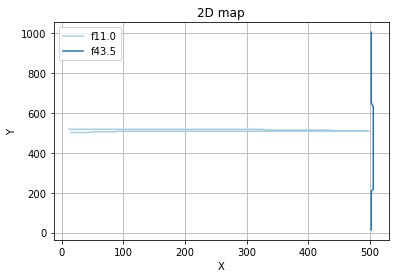

In [54]:
veh = ["f11.0","f43.5"]
df_veh = mask_veh(df,veh)
plot_2D(df_veh, palette = "Paired", legend = "True", grid = "True")

10 unique vehicles found in the simulation


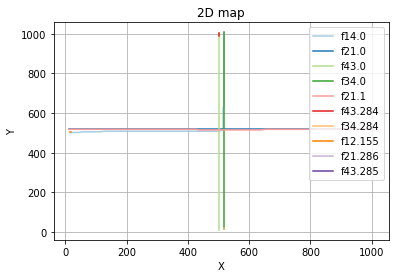

In [64]:
df_test_veh = mask_veh(df,test_veh)
plot_2D(df_test_veh, palette = "Paired", legend = "False", grid = "True")

In [71]:
df_test_veh.time.unique()

array(['0.00', '1.00', '2.00', '3.00', '4.00', '5.00', '6.00', '7.00',
       '8.00', '9.00', '10.00', '11.00', '12.00', '13.00', '14.00',
       '15.00', '16.00', '17.00', '18.00', '19.00', '20.00', '21.00',
       '22.00', '23.00', '24.00', '25.00', '26.00', '27.00', '28.00',
       '29.00', '30.00', '31.00', '32.00', '33.00', '34.00', '35.00',
       '36.00', '37.00', '38.00', '39.00', '40.00', '41.00', '42.00',
       '43.00', '44.00', '45.00', '46.00', '47.00', '48.00', '49.00',
       '50.00', '51.00', '52.00', '53.00', '54.00', '55.00', '56.00',
       '57.00', '58.00', '59.00', '60.00', '61.00', '62.00', '63.00',
       '64.00', '65.00', '66.00', '67.00', '68.00', '69.00', '70.00',
       '71.00', '72.00', '73.00', '74.00', '75.00', '76.00', '77.00',
       '78.00', '79.00', '80.00', '81.00', '82.00', '83.00', '84.00',
       '85.00', '86.00', '87.00', '88.00', '89.00', '90.00', '91.00',
       '92.00', '93.00', '94.00', '95.00', '96.00', '97.00', '98.00',
       '99.00', '100.

In [66]:
def mask_timestep(df,timestep):
    if not isinstance(veh,list):
        mask = (df.time == str(timestep))
        return df[mask]
    else:
        #mask = (df.vehID in veh)
        return df[df['time'].isin(timestep)]

5 unique vehicles found in the simulation
f14.0
f21.0
f43.0
f34.0
f21.1


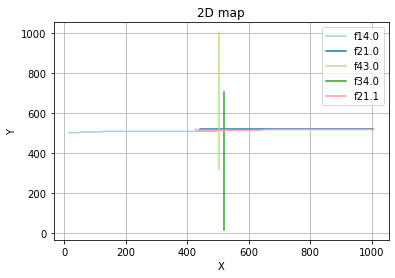

In [72]:
df_test = mask_timestep(df_test_veh,df_test_veh.time.unique()[:50])
plot_2D(df_test, palette = "Paired", legend = "False", grid = "True")

In [89]:
list_timesteps = df_test.time.unique()

# for each time step, we get a df of vehicles mutual distances
timestep = list_timesteps[0]
# reduced df with only the time step
df_timestep = mask_timestep(df_test,timestep)
df_timestep, df_timestep.vehID.unique()

(   time  vehID       X       Y    yaw             type  speed  pos  lane  \
 0  0.00  f14.0    15.1   502.0   90.0  DEFAULT_VEHTYPE    0.0  5.1  1i_0   
 1  0.00  f21.0  1004.9   518.0  270.0  DEFAULT_VEHTYPE    0.0  5.1  2i_0   
 2  0.00  f43.0   502.0  1004.9  180.0  DEFAULT_VEHTYPE    0.0  5.1  4i_0   
 
    slope  signals  
 0    0.0        0  
 1    0.0        0  
 2    0.0        0  ,
 array(['f14.0', 'f21.0', 'f43.0'], dtype=object))

In [129]:
from itertools import combinations
from math import hypot

def distance(p1,p2):
    """
    Euclidean distance between two points
    """
    x1,y1 = p1
    x2,y2 = p2
    return hypot(x2 - x1, y2 - y1)

In [133]:
list_combinations = [combo for combo in combinations(df_timestep.vehID.unique().tolist(),2)]
#print (list_combinations)
all_row_dict = []
for combo in list_combinations:
    #print (combo)
    veh_a,veh_b = combo
    print()
    p1 = (float(mask_veh(df_timestep,veh_a)['X']),float(mask_veh(df_timestep,veh_a)['Y']))
    p2 = (float(mask_veh(df_timestep,veh_b)['X']),float(mask_veh(df_timestep,veh_b)['Y']))
    row= {'veh_a': veh_a,
          'veh_b': veh_b,
          '(xa,ya)':p1,
          '(xb,yb)':p2,
          'distance': distance(p1,p2)
    }
    all_row_dict.append(row)
df_distances = pd.DataFrame(all_row_dict)
df_distances

,veh_a,veh_b,"(xa,ya)","(xb,yb)",distance
0,f14.0,f21.0,"(15.1, 502.0)","(1004.9, 518.0)",989.929311
1,f14.0,f43.0,"(15.1, 502.0)","(502.0, 1004.9)",699.985728
2,f21.0,f43.0,"(1004.9, 518.0)","(502.0, 1004.9)",699.985728


In [95]:
list_of_coords = list(zip(df_timestep.X,df_timestep.Y))
list_of_coords

[(15.1, 502.0), (1004.9, 518.0), (502.0, 1004.9)]

In [74]:
#list(zip(df_test.X,df_test.Y))

In [65]:
import networkx as nx
G = nx.Graph()

In [46]:
G = nx.from_pandas_edgelist(df, 'vehID')
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

KeyError: 'target'